In [26]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph
import random

In [27]:
class AgentState(TypedDict):
    counter: int
    should_we_continue: bool

In [44]:
from calendar import c


def greeter(state: AgentState) -> AgentState:
    """
    Greeting with makeing counter 0
    """
    state["counter"] = 0
    print("Hello")
    return state

def work(state: AgentState) -> AgentState:
    """
    Randomely changes should_we_continue
    """
    state["should_we_continue"] = random.randint(0, 1)
    state["counter"] += 1
    return state

def decider(state: AgentState) -> str:

    """
    decide whether to stop looping based on should_we_continue
    """
    if state["should_we_continue"]:
        return "continue"
    else:
        return "exit"

def fina(state: AgentState) -> AgentState:
    """
    Ends program
    """
    print("counter:", state["counter"])
    return state
        

In [45]:
graph = StateGraph(AgentState)

graph.add_node("greeter", greeter)
graph.add_node("work", work)
graph.add_node("fina", fina)

graph.add_edge("greeter", "work")
graph.add_conditional_edges(
    "work",
    decider,
    {
        "continue": "work",
        "exit": "fina"
    }
)

graph.set_entry_point("greeter")
graph.set_finish_point("fina")

app = graph.compile()

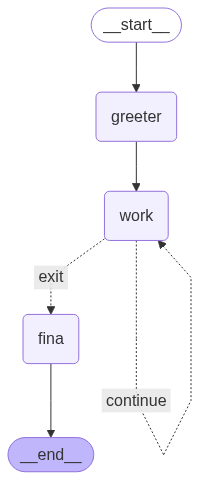

In [46]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [47]:
result = app.invoke({"counter": 10, "should_we_continue": 1})

Hello
counter: 2
